# Exploratory Data Analysis (1/2)

In this notebook, we will conduct **<u>preliminary exploratory data analysis</u>** and document all initial findings about the given datasets. It is important to note that cleaning of the datasets have not been performed yet and the purpose is to understand the raw dataset.

There are seven csv files in total. Five of which pertain to sensor data received from telematic devices from within Just Taxi's cars driving trips to detect if the trip is dangerous and has high crash / accident probability. The other two datasets contain data on the driver and safety classification of trips.

---

## 1. Data Dictionary

### 1.1 sensor_data

> **Note**: Acceleration determines the acceleration / vibration of the device in motion. Each of the axis can be thought of as a different sensor even though they reside on the same physical chip. Gyroscope data determine the orientation of the device relative to earth's gravity.

|     Data Field     |               Description                 |
|--------------------|-------------------------------------------|
|     bookingID      |      unique booking ID for each trip      |
|     accuracy       |     accuracy inferred by GPS in meters    |
|     bearing        |           GPS bearing in degree           |
|     acceleration_x |  accelerometer reading at x axis (m/s2)   |
|     acceleration_y |  accelerometer reading at y axis (m/s2)   |
|     acceleration_z |  accelerometer reading at z axis (m/s2)   |
|     gyro_x         |    gyroscope reading in x axis (rad/s)    |
|     gyro_y         |    gyroscope reading in y axis (rad/s)    |
|     gyro_z         |    gyroscope reading in z axis (rad/s)    |
|     second         |  time of the record by number of seconds  |
|     speed          |       speed measured by GPS in m/s        |


### 1.2 driver_data

|     Data Field     |               Description                 |
|--------------------|-------------------------------------------|
|         id         |             unique driver ID              |
|        name        |               driver's name               |
|       gender       |              driver's gender              |
|      car_model     |             brand of the taxi             |
|   car_make_year    |        when the car was manufactured      |
|       rating       |  driver's rating from previous customers  |

### 1.3 safety_labels

|     Data Field     |               Description                 |
|--------------------|-------------------------------------------|
|     bookingID      |      unique booking ID for each trip      |
|         id         |             unique driver ID              |
|        label       |  tags to indicate dangerous driving trip (0: Normal  / 1: Dangerous) |

---

## 2. Import Libraries

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('white')

---

## 3. Import Datasets

In [2]:
# concatenate all csv files in the sensor_data folder
sensor_data = glob.glob('../data/sensor_data/*.csv')
sensor_data = [pd.read_csv(file) for file in sensor_data]
sensor_df = pd.concat(sensor_data, ignore_index=True)

driver_df = pd.read_csv('../data/driver_data.csv')
safety_df = pd.read_csv('../data/safety_labels.csv')

### 3.1 Dataset preview

In [3]:
print('\033[1m' + 'First 5 rows of sensor_df:' + '\033[0m')
sensor_df.head()

First 5 rows of sensor_df:


,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1202590843006,3.000,353.0,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000
1,274877907034,9.293,17.0,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000
2,884763263056,3.000,189.0,1.139675,9.545974,1.951334,-0.006899,-0.015080,0.001122,973.0,0.667059
3,1073741824054,3.900,126.0,3.871542,10.386364,-0.136474,0.001344,-0.339601,-0.017956,902.0,7.913285
4,1056561954943,3.900,50.0,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530,820.0,20.419409


In [4]:
print('\033[1m' + 'First 5 rows of driver_df:' + '\033[0m')
driver_df.head()

First 5 rows of driver_df:


,id,name,date_of_birth,gender,car_model,car_make_year,rating
0,1,Tressa,1/12/1992,Female,Mazda,2011,4.5
1,2,Virgilio,10/23/1992,Male,Mazda,2004,3.5
2,3,Bert,8/10/1989,Male,Nissan,2008,4.5
3,4,Mahmoud,8/14/1981,Male,Toyota,2008,4.5
4,5,Felecia,7/20/1990,Female,Hyundai,2010,4.5


In [5]:
print('\033[1m' + 'First 5 rows of safety_df:' + '\033[0m')
safety_df.head()

First 5 rows of safety_df:


,bookingID,driver_id,label
0,111669149733,140,0
1,335007449205,15,1
2,171798691856,61,0
3,1520418422900,97,0
4,798863917116,92,0


---

## 4. Dataset Summary

### 4.1 Sensor data summary

In [6]:
print('\033[1m' + 'sensor_df info:' + '\033[0m')
sensor_df.info(show_counts=True)

sensor_df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7469656 entries, 0 to 7469655
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   bookingID       7469656 non-null  int64  
 1   Accuracy        7351631 non-null  float64
 2   Bearing         7350253 non-null  float64
 3   acceleration_x  7364539 non-null  float64
 4   acceleration_y  7346553 non-null  float64
 5   acceleration_z  7370520 non-null  float64
 6   gyro_x          7336398 non-null  float64
 7   gyro_y          7329944 non-null  float64
 8   gyro_z          7404168 non-null  float64
 9   second          7469656 non-null  float64
 10  Speed           7346079 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 626.9 MB


#### 4.1.1 Unique values in sensor data

In [7]:
print('\033[1m' + 'No. of unique values in sensor_df:' + '\033[0m')
sensor_df.nunique()

No. of unique values in sensor_df:


bookingID           20000
Accuracy            38534
Bearing           1104659
acceleration_x     904124
acceleration_y     854584
acceleration_z    1302936
gyro_x            1979270
gyro_y            2152056
gyro_z            1683418
second               6256
Speed             3139184
dtype: int64

#### 4.1.2 Missingness in sensor data

In [8]:
null_count = sensor_df.isna().sum()
null_percent = round((sensor_df.isna().sum() / len(sensor_df)) * 100, 3)

nullity = pd.DataFrame({
    'null_count' :  null_count,
    'null_percent' : null_percent
}, index=null_count.index).sort_values(
    by=['null_count', 'null_percent'], ascending=False)

nullity

,null_count,null_percent
gyro_y,139712,1.870
gyro_x,133258,1.784
Speed,123577,1.654
acceleration_y,123103,1.648
Bearing,119403,1.599
Accuracy,118025,1.580
acceleration_x,105117,1.407
acceleration_z,99136,1.327
gyro_z,65488,0.877
bookingID,0,0.000


#### 4.1.3 Sensor data numerical summary

In [9]:
sensor_df.describe().T

,count,mean,std,min,25%,50%,75%,max
bookingID,7469656.0,8.183371e+11,4.953348e+11,0.000000,3.779571e+11,8.074539e+11,1.254130e+12,1.709397e+12
Accuracy,7351631.0,1.162066e+01,8.727007e+01,0.750000,3.900000e+00,4.247000e+00,8.000000e+00,6.070101e+03
Bearing,7350253.0,1.689699e+02,1.072942e+02,0.000000,7.800000e+01,1.688404e+02,2.630000e+02,3.599995e+02
acceleration_x,7364539.0,6.918624e-02,1.424023e+00,-38.983994,-5.087219e-01,6.130981e-02,6.355286e-01,6.687346e+01
acceleration_y,7346553.0,4.467981e+00,8.130443e+00,-57.800190,-2.026514e+00,9.081485e+00,9.710308e+00,7.281000e+01
acceleration_z,7370520.0,8.964518e-01,3.252218e+00,-78.448420,-9.295166e-01,7.776642e-01,2.753036e+00,7.805576e+01
gyro_x,7336398.0,-1.738806e-03,1.445958e-01,-48.455750,-2.679080e-02,-6.561279e-04,2.329046e-02,3.870809e+01
gyro_y,7329944.0,2.046962e-04,3.371285e-01,-57.344890,-2.996360e-02,2.583960e-04,3.142024e-02,8.031496e+01
gyro_z,7404168.0,-2.468964e-04,1.480074e-01,-53.554450,-1.872362e-02,-3.051758e-05,1.825411e-02,4.505986e+01
second,7469656.0,3.669335e+03,1.378355e+06,0.000000,2.410000e+02,5.200000e+02,8.620000e+02,6.193165e+08


**<u>Observations</u>**

- Columns are in their appropriate data types.
- From the above outputs, it is clear that there are some columns with missing values.
- We can also see that the dataset contains 20,000 unqiue taxi trips.


### 4.2 Driver data summary

In [10]:
print('\033[1m' + 'driver_df info:' + '\033[0m')
driver_df.info(show_counts=True)

driver_df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             148 non-null    int64  
 1   name           148 non-null    object 
 2   date_of_birth  148 non-null    object 
 3   gender         148 non-null    object 
 4   car_model      148 non-null    object 
 5   car_make_year  148 non-null    int64  
 6   rating         148 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


#### 4.2.1 Unique values in driver data

In [11]:
print('\033[1m' + 'No. of unique values in driver_df:' + '\033[0m')
driver_df.nunique()

No. of unique values in driver_df:


id               148
name             147
date_of_birth    148
gender             2
car_model         10
car_make_year     10
rating             5
dtype: int64

#### 4.2.2 Driver data numerical summary

In [12]:
driver_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,148.0,74.500000,42.868014,1.0,37.75,74.5,111.25,148.0
car_make_year,148.0,2009.439189,2.399621,2004.0,2008.00,2011.0,2011.00,2013.0
rating,148.0,4.081081,0.541018,3.0,3.50,4.0,4.50,5.0


**<u>Observations</u>**

- `data_of_birth` is not in correct datatype and should be a datetime datatype.
- There are no missing values within the driver dataset.
- There is a proper number of unique values in each column as expected.

### 4.3 Safety data summary

In [13]:
print('\033[1m' + 'safety_df info:' + '\033[0m')
safety_df.info(show_counts=True)

safety_df info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   bookingID  20000 non-null  int64
 1   driver_id  20000 non-null  int64
 2   label      20000 non-null  int64
dtypes: int64(3)
memory usage: 468.9 KB


#### 4.3.1 Unique values in safety data

In [14]:
print('\033[1m' + 'No. of unique values in safety_df:' + '\033[0m')
safety_df.nunique()

No. of unique values in safety_df:


bookingID    20000
driver_id      148
label            2
dtype: int64

#### 4.3.2 Safety data numerical summary

In [15]:
safety_df.describe().T

,count,mean,std,min,25%,50%,75%,max
bookingID,20000.0,8.162027e+11,4.945137e+11,0.0,3.865471e+11,7.988639e+11,1.245541e+12,1.709397e+12
driver_id,20000.0,7.444405e+01,4.274658e+01,1.0,3.700000e+01,7.500000e+01,1.110000e+02,1.480000e+02
label,20000.0,2.496500e-01,4.328213e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


**<u>Observations</u>**

- No missing values in safety dataset.
- all columns in correct datatype.

---

## 5. Missingness Analysis

In [16]:
print('\033[1m' + 'Total missingness in sensor_df:' + '\033[0m')
nullity.sum()

Total missingness in sensor_df:


null_count      1026819.000
null_percent         13.746
dtype: float64

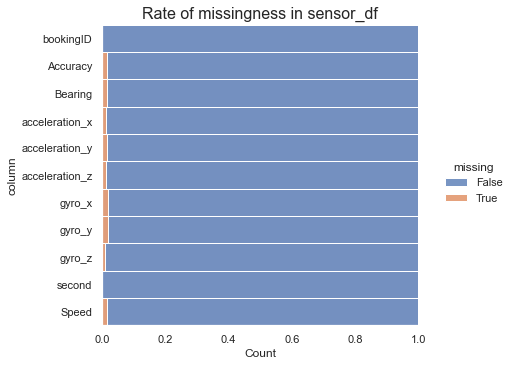

In [17]:
null_cols = sensor_df.isna().melt(var_name='column', value_name="missing")

sns.set(rc={'figure.figsize':(13,8)})
sns.displot(
    data=null_cols,
    y="column",
    hue="missing",
    multiple="fill",
    aspect=1.25,
)

plt.title('Rate of missingness in sensor_df', fontsize=16)
plt.grid(False)
plt.show()

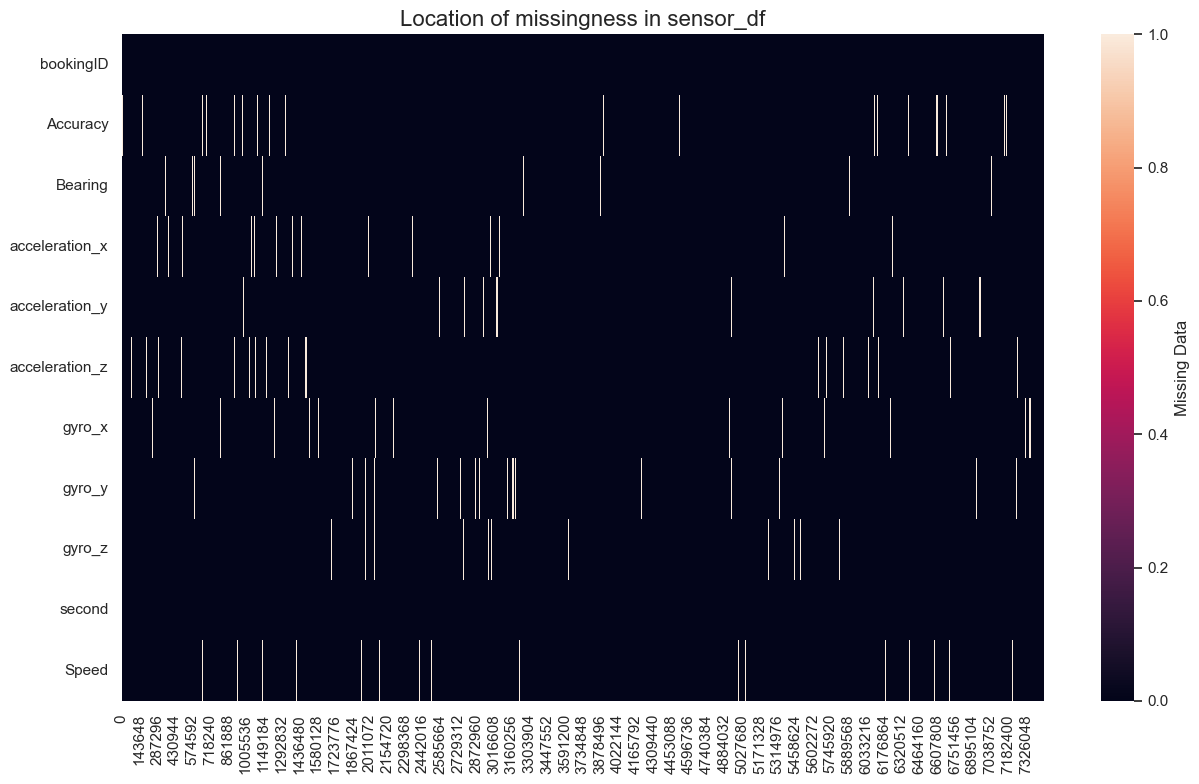

In [18]:
sns.set(rc={'figure.figsize':(13,8)})
sns.heatmap(sensor_df.isna().T,
            cbar_kws={'label': 'Missing Data'})

plt.title('Location of missingness in sensor_df', fontsize=16)
plt.tight_layout()
plt.show()

**<u>Observations</u>**

- Missingness in the sensor dataset seem to be systematic as patterns are visible.
- This may be due to faulty sensor equipment, casusing one or more variables to not get captured.
- There are 102,6819 missing values,  which make up 13.75% of the sensor dataset.
- This may prompt either imputation or dropping of values.

## 6. Feature Analysis 

### 6.1 Distribution of numerical features in sensor data

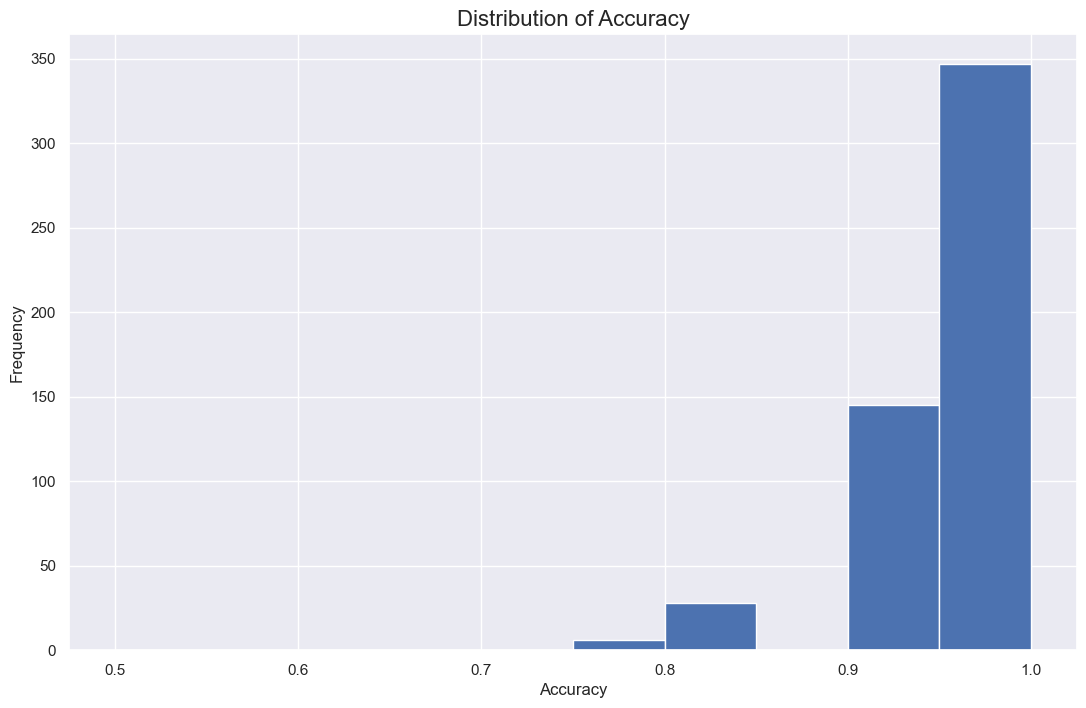

In [35]:
plt.hist(sensor_df['Accuracy'], bins=10, range=(.5, 1))
plt.title('Distribution of Accuracy', fontsize=16)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

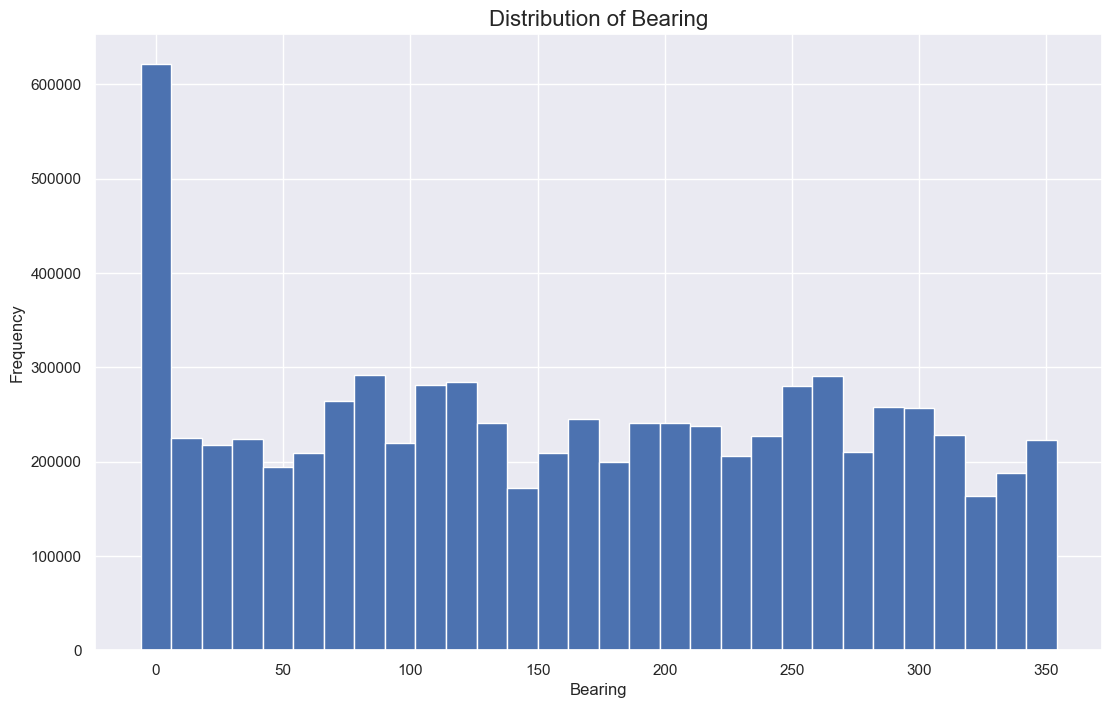

In [86]:
plt.hist(sensor_df['Bearing'], bins=30, range=(0, 360), align='left')
plt.title('Distribution of Bearing', fontsize=16)
plt.xlabel('Bearing')
plt.ylabel('Frequency')
plt.show()

In [73]:
sensor_df[['acceleration_x', 'acceleration_y', 'acceleration_z']].describe().T

,count,mean,std,min,25%,50%,75%,max
acceleration_x,7364539.0,0.069186,1.424023,-38.983994,-0.508722,0.061310,0.635529,66.873456
acceleration_y,7346553.0,4.467981,8.130443,-57.800190,-2.026514,9.081485,9.710308,72.810000
acceleration_z,7370520.0,0.896452,3.252218,-78.448420,-0.929517,0.777664,2.753036,78.055756


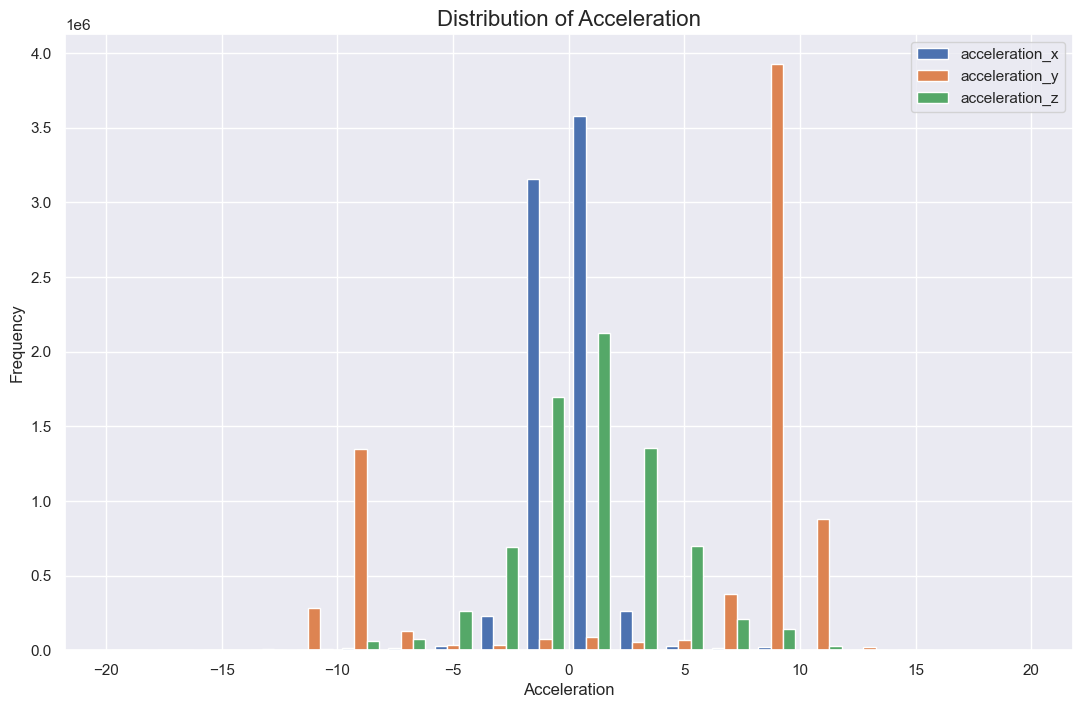

In [84]:
acceleration = sensor_df[['acceleration_x', 'acceleration_y', 'acceleration_z']]
plt.hist(acceleration, bins=20, range=(-20, 20), align='mid')
plt.title('Distribution of Acceleration', fontsize=16)
plt.xlabel('Acceleration')
plt.ylabel('Frequency')
plt.legend(['acceleration_x', 'acceleration_y', 'acceleration_z'])
plt.show()

In [140]:
# time series of acceleration values (x, y, z)
acceleration = sensor_df[['acceleration_x', 'acceleration_y', 'acceleration_z']]

In [139]:
# time series of gyroscope values (x, y, z)
gyroscope = sensor_df[['gyro_x', 'gyro_y', 'gyro_z']]

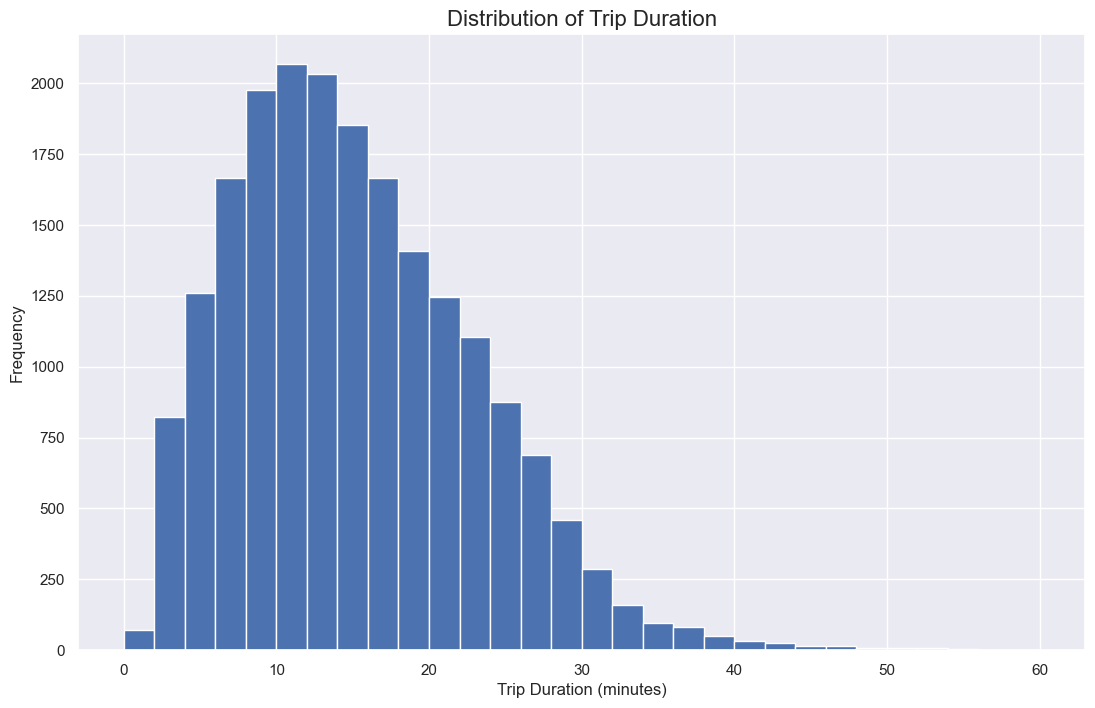

In [120]:
# total seconds of each bookingID
max_trip_seconds = sensor_df.groupby('bookingID')['second'].max()

# convert to minutes
max_trip_minutes = max_trip_seconds / 60

# plot distribution of trip duration
plt.hist(max_trip_minutes, bins=30, range=(0, 60), align='mid')
plt.title('Distribution of Trip Duration', fontsize=16)
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

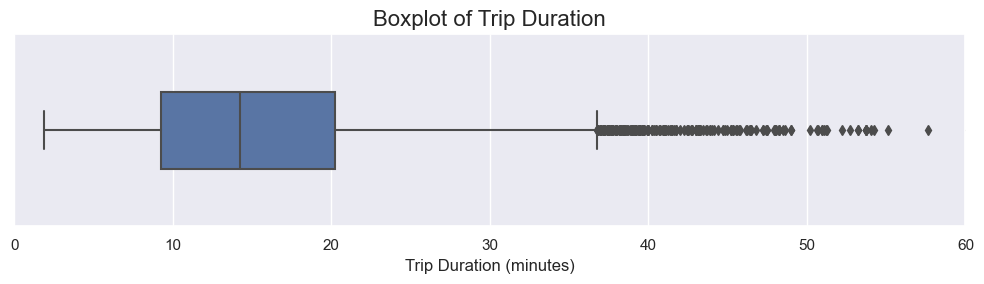

In [146]:
# boxplot of trip duration
plt.figure(figsize=(10, 3))
sns.boxplot(x=max_trip_minutes, width=.4)
plt.title('Boxplot of Trip Duration', fontsize=16)
plt.xlabel('Trip Duration (minutes)')
plt.xlim(0, 60)
plt.tight_layout()
plt.show()

In [148]:
sensor_df['Speed'].to_frame().describe().T

,count,mean,std,min,25%,50%,75%,max
Speed,7346079.0,9.003918,8.105558,-2.0,1.017968,7.5249,15.477182,88.037254


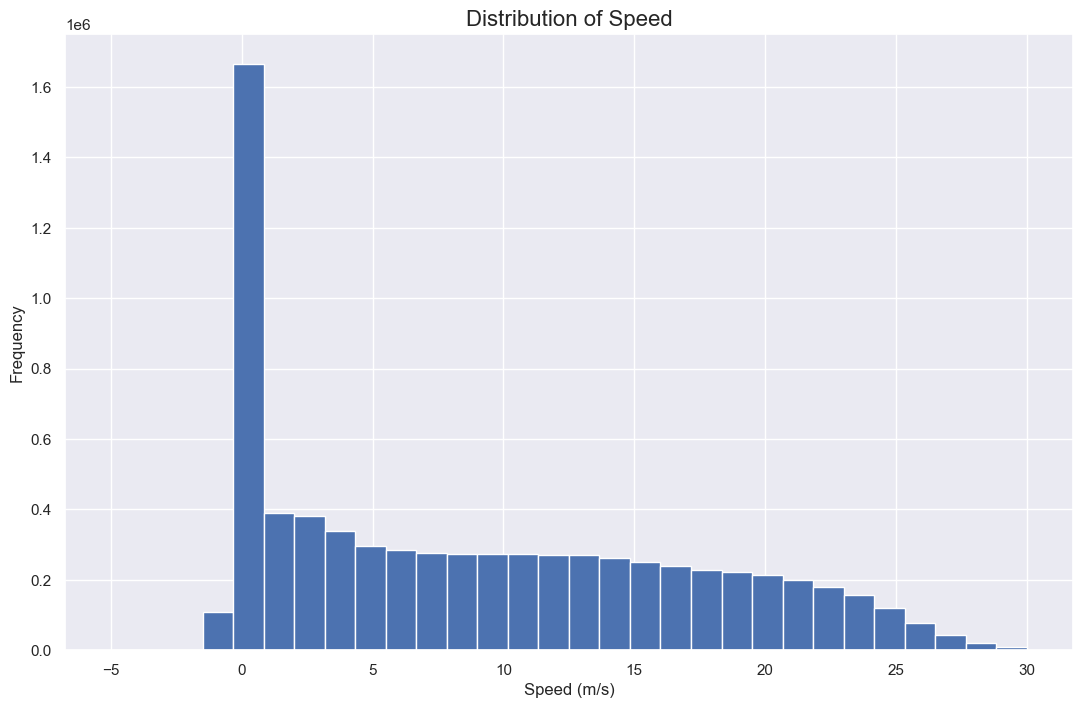

In [174]:
plt.hist(sensor_df['Speed'], bins=30, range=(-5, 30), align='mid')
plt.title('Distribution of Speed', fontsize=16)
plt.xlabel('Speed (m/s)')
plt.ylabel('Frequency')
plt.show()

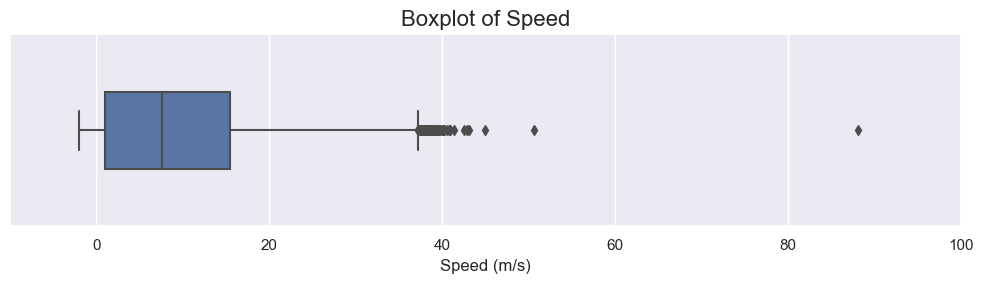

In [167]:
# boxplot of speed
plt.figure(figsize=(10, 3))
sns.boxplot(x=sensor_df['Speed'], width=.4)
plt.title('Boxplot of Speed', fontsize=16)
plt.xlabel('Speed (m/s)')
plt.xlim(-10, 100)
plt.tight_layout()
plt.show()

### 6.2 Count of car make year

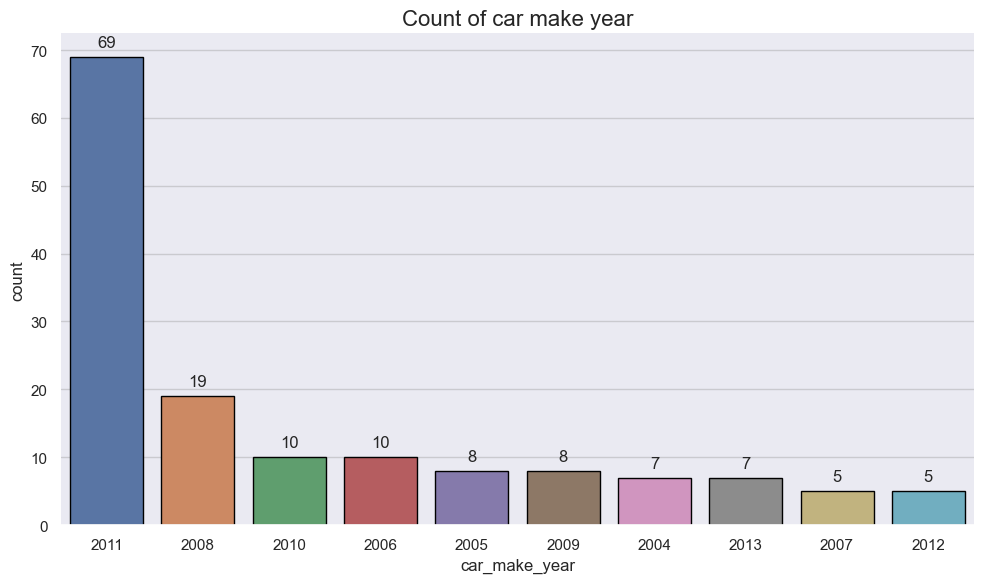

In [22]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style(rc={'patch.force_edgecolor':True,
                   'patch.edgecolor': 'black'})

ax = sns.countplot(x=driver_df['car_make_year'], order=driver_df['car_make_year'].value_counts().index)
ax.bar_label(container=ax.containers[0], padding=5)

plt.title('Count of car make year', fontsize=16)
plt.grid(axis='y', color='grey', alpha=.3)
sns.despine(left=True, bottom=False)
plt.tight_layout()
plt.show()

### 6.3 Count of car models

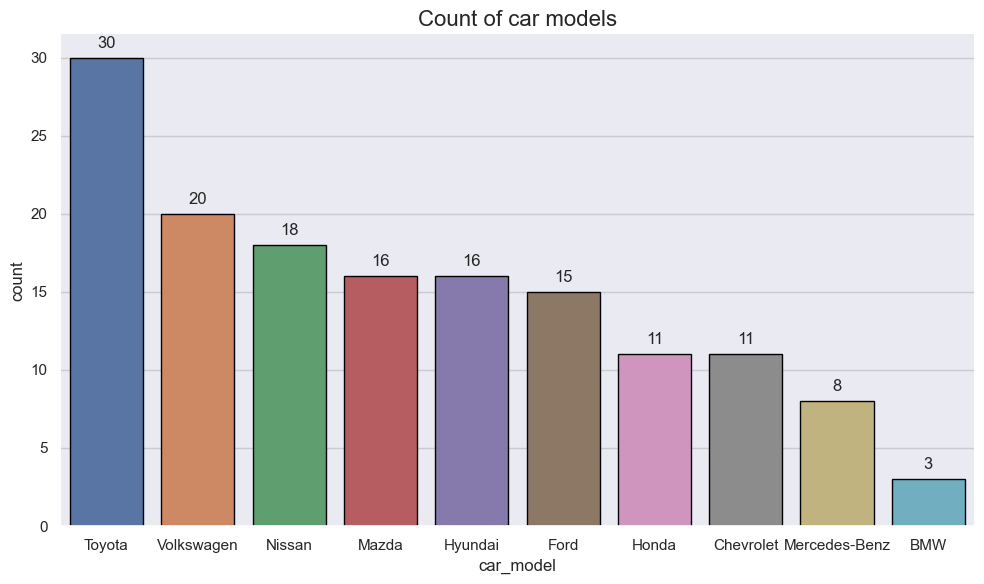

In [23]:
# countplot of car model
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style(rc={'patch.force_edgecolor':True,
                         'patch.edgecolor': 'black'})

ax = sns.countplot(x=driver_df['car_model'], order=driver_df['car_model'].value_counts().index)
ax.bar_label(container=ax.containers[0], padding=5)

plt.title('Count of car models', fontsize=16)
plt.grid(axis='y', color='grey', alpha=.3)
sns.despine(left=True, bottom=False)
plt.tight_layout()
plt.show()

### 6.4 Count of driver ratings

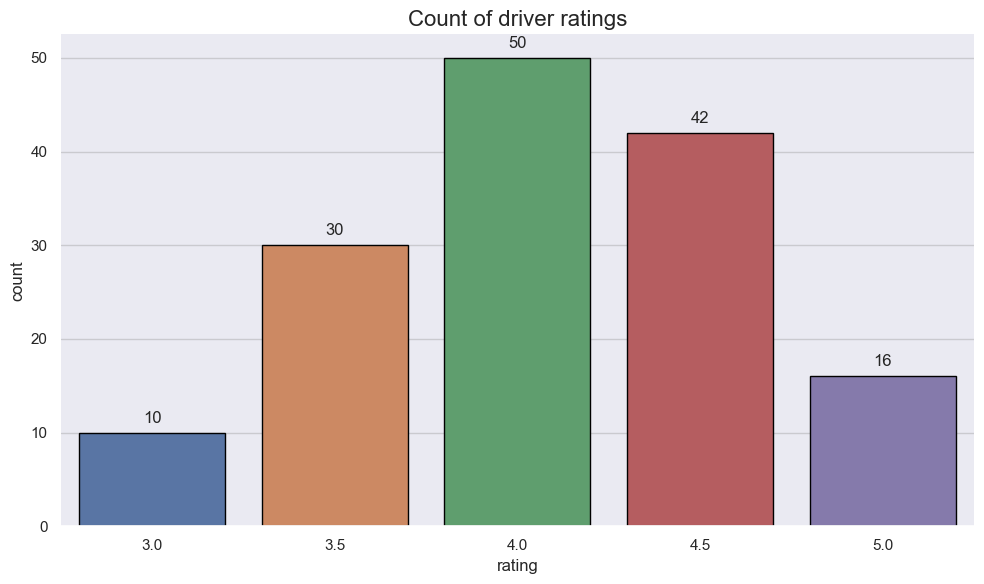

In [24]:
# countplot of rating
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style(rc={'patch.force_edgecolor':True,
                            'patch.edgecolor': 'black'})

ax = sns.countplot(x=driver_df['rating'])
ax.bar_label(container=ax.containers[0], padding=5)

plt.title('Count of driver ratings', fontsize=16)
plt.grid(axis='y', color='grey', alpha=.3)
sns.despine(left=True, bottom=False)
plt.tight_layout()
plt.show()

### 6.5 Boxplot of driver ratings

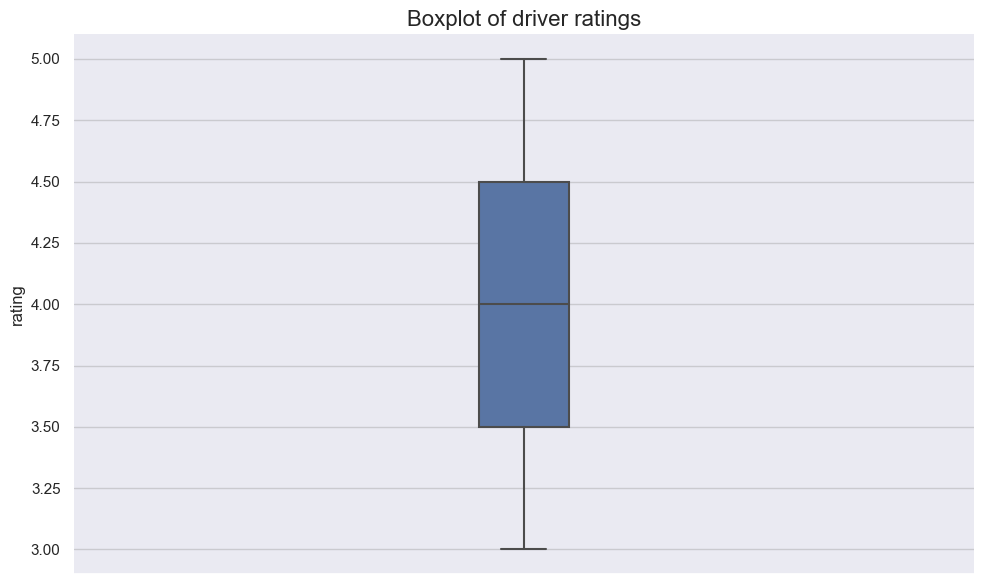

In [25]:
# boxplot of driver ratings 
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style(rc={'patch.force_edgecolor':True,
                            'patch.edgecolor': 'black'})

ax = sns.boxplot(y=driver_df['rating'], width=.1)

plt.title('Boxplot of driver ratings', fontsize=16)
plt.grid(axis='y', color='grey', alpha=.3)
sns.despine(left=True, bottom=False)
plt.tight_layout()
plt.show()

### 6.6 Pie chart of driver gender

,Male,Female
gender,93,55


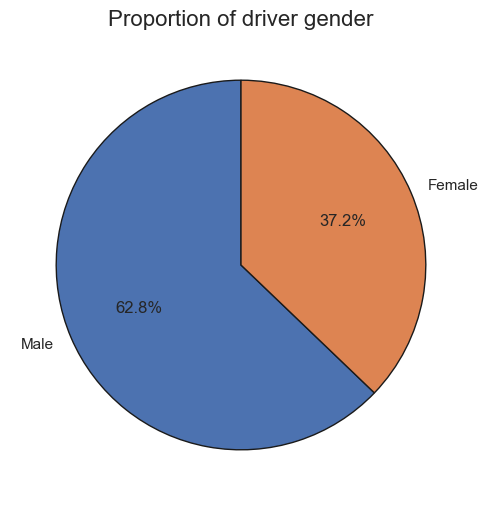

In [26]:
# dataframe of gender counts
display(pd.DataFrame(driver_df['gender'].value_counts()).T)

# pie chart of driver gender
sns.set(rc={'figure.figsize':(6,6)})

plt.pie(driver_df['gender'].value_counts(), autopct='%.1f%%', labels=['Male', 'Female'], startangle=90,
            wedgeprops=dict(edgecolor='k'))            
plt.title('Proportion of driver gender', fontsize=16)
plt.show()

### 6.7 Pie chart of safety classification

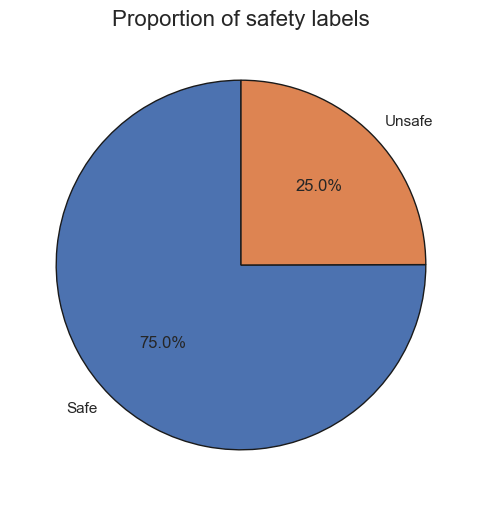

In [27]:
# plot piechart of safety labels
sns.set(rc={'figure.figsize':(6,6)})
plt.pie(safety_df['label'].value_counts(), autopct='%.1f%%', labels=['Safe', 'Unsafe'], startangle=90,
            wedgeprops=dict(edgecolor='k'))

plt.title('Proportion of safety labels', fontsize=16)
plt.show()